<a href="https://colab.research.google.com/github/smaciasg/prediciones-ventas/blob/main/Predicciones_de_ventas_alimenticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_predicciones = pd.read_csv('/content/drive/MyDrive/CODING DOJO/DATA SCIENCE/ACTIVIDADES SEMANA 1/sales_predictions.csv')
data_predicciones.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#**Proyecto 1 - Parte 2 (base)**

1) ¿Cuántas filas y columnas?

In [3]:
data_predicciones.shape
#Tiene 8523 filas y 12 columnas

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [4]:
data_predicciones.info()
#En una exlporación rápida se identifica que los tipos de datos coinciden con lo que se entrega en el df y lo que se espera de cada variable
#Se observan datos faltantes para el peso del ítem y el tamaño de la tienda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [5]:
data_predicciones.duplicated().sum()
#Según la exploración no existen filas 100% duplicadas, los valores flotantes reducen esta posibilidad.

0

4) Identifiquen los valores faltantes.

In [6]:
(data_predicciones.isna().sum()/len(data_predicciones))*100
#Del total de datos se observa que  el peso del ítem y el tamaño de la tienda presentan faltantes, se deben explorar los datos para determinar cómo llenarlos, en ambos casos
# no se cumple la condición recomedada para eliminación un 50% de faltantes en columnas y menos de un 2% faltante en filas.

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [7]:
# En el caso del peso sería convemiente reemplazar el peso con el promedio, veamos cómo obtener el valor:
data_pesos = data_predicciones.groupby(['Item_Identifier'])[['Item_Weight']].mean()
# De este modo se tienen los valores 
# Podemos convertir este resultado en un diccionario y pasarlos en los datos faltantes
data_pesos

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [8]:
#Función para el reemplazo de los datos
data_pesos_dict = data_pesos.to_dict()
data_pesos_dict

{'Item_Weight': {'DRA12': 11.6,
  'DRA24': 19.35,
  'DRA59': 8.27,
  'DRB01': 7.39,
  'DRB13': 6.115,
  'DRB24': 8.785,
  'DRB25': 12.3,
  'DRB48': 16.75,
  'DRC01': 5.92,
  'DRC12': 17.85,
  'DRC13': 8.26,
  'DRC24': 17.85,
  'DRC25': 5.73,
  'DRC27': 13.800000000000002,
  'DRC36': 13.0,
  'DRC49': 8.67,
  'DRD01': 12.1,
  'DRD12': 6.96,
  'DRD13': 15.0,
  'DRD15': 10.6,
  'DRD24': 13.85,
  'DRD25': 6.135000000000001,
  'DRD27': 18.75,
  'DRD37': 9.8,
  'DRD49': 9.895,
  'DRD60': 15.7,
  'DRE01': 10.1,
  'DRE03': 19.6,
  'DRE12': 4.59,
  'DRE13': 6.28,
  'DRE15': 13.35,
  'DRE25': 15.35,
  'DRE27': 11.85,
  'DRE37': 13.5,
  'DRE48': 8.43,
  'DRE49': 20.75,
  'DRE60': 9.395,
  'DRF01': 5.655,
  'DRF03': 19.1,
  'DRF13': 12.1,
  'DRF15': 18.35,
  'DRF23': 4.61,
  'DRF25': 9.0,
  'DRF27': 8.93,
  'DRF36': 16.1,
  'DRF37': 17.25,
  'DRF48': 5.73,
  'DRF49': 7.269999999999999,
  'DRF51': 15.75,
  'DRF60': 10.8,
  'DRG01': 14.800000000000002,
  'DRG03': 14.5,
  'DRG11': 6.385,
  'DRG13': 17

In [9]:
data_pesos_dict['Item_Weight']['DRA12']

11.6

In [10]:
#Función para asignación
def asignacion_pesos(dt_pesos_estimados_dic,dt_original_a_imputar):
  lista_pesos_asignados = []
  valor_promedio_pesos = dt_original_a_imputar['Item_Weight'].mean()
  for i in range(len(dt_original_a_imputar)):
    if pd.isna(dt_original_a_imputar['Item_Weight'][i]) == True:
      if pd.isna(dt_pesos_estimados_dic['Item_Weight'][dt_original_a_imputar['Item_Identifier'][i]]) == True:
        lista_pesos_asignados.append(valor_promedio_pesos)
      else:
          lista_pesos_asignados.append(dt_pesos_estimados_dic['Item_Weight'][dt_original_a_imputar['Item_Identifier'][i]])
    else:
      lista_pesos_asignados.append(dt_original_a_imputar['Item_Weight'][i])
  return lista_pesos_asignados

In [11]:
data_predicciones['Item_Weight'] = asignacion_pesos(data_pesos_dict,data_predicciones)

In [12]:
data_predicciones.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
data_predicciones[['Outlet_Identifier','Outlet_Size']].value_counts(dropna=False)
#Identificamos el código de cada una de las tiendas, al ser un parámetro no vacío, se busca el tamaño de cada tienda

Outlet_Identifier  Outlet_Size
OUT027             Medium         935
OUT013             High           932
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
OUT045             NaN            929
OUT018             Medium         928
OUT017             NaN            926
OUT010             NaN            555
OUT019             Small          528
dtype: int64

In [14]:
#Vamos a ver si el tamaño de la tienda tiene relación con alguna variable
data_predicciones.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dropna=False)[['Outlet_Identifier']].count()

,,,,Outlet_Identifier
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT010,NaN,Tier 3,Grocery Store,555
OUT013,High,Tier 3,Supermarket Type1,932
OUT017,NaN,Tier 2,Supermarket Type1,926
OUT018,Medium,Tier 3,Supermarket Type2,928
OUT019,Small,Tier 1,Grocery Store,528
OUT027,Medium,Tier 3,Supermarket Type3,935
OUT035,Small,Tier 2,Supermarket Type1,930
OUT045,NaN,Tier 2,Supermarket Type1,929
OUT046,Small,Tier 1,Supermarket Type1,930


In [15]:
data_predicciones.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dropna=False)[['Item_Weight']].sum()

,,,,Item_Weight
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT010,NaN,Tier 3,Grocery Store,7166.800000
OUT013,High,Tier 3,Supermarket Type1,12121.730000
OUT017,NaN,Tier 2,Supermarket Type1,11877.495000
OUT018,Medium,Tier 3,Supermarket Type2,11946.465000
OUT019,Small,Tier 1,Grocery Store,6868.602645
OUT027,Medium,Tier 3,Supermarket Type3,12093.557936
OUT035,Small,Tier 2,Supermarket Type1,11931.295000
OUT045,NaN,Tier 2,Supermarket Type1,11751.840000
OUT046,Small,Tier 1,Supermarket Type1,11966.125000


In [16]:
data_predicciones.groupby(['Outlet_Establishment_Year','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dropna=False)[['Item_Weight']].sum()

Item_Weight
Outlet_Establishment_Year Outlet_Identifier Outlet_Size Outlet_Location_Type Outlet_Type                    
1985                      OUT019            Small       Tier 1               Grocery Store       6868.602645
                          OUT027            Medium      Tier 3               Supermarket Type3  12093.557936
1987                      OUT013            High        Tier 3               Supermarket Type1  12121.730000
1997                      OUT046            Small       Tier 1               Supermarket Type1  11966.125000
1998                      OUT010            NaN         Tier 3               Grocery Store       7166.800000
1999                      OUT049            Medium      Tier 1               Supermarket Type1  12013.225000
2002                      OUT045            NaN         Tier 2               Supermarket Type1  11751.840000
2004                      OUT035            Small       Tier 2               Supermarket Type1  11931.295000
2007                      OUT017            NaN         Tier 2               Supermarket Type1  11877.495000
2009                      OUT018            Medium      Tier 3               Supermarket Type2  11946.465000

In [17]:
data_predicciones.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'], dropna=False)[['Item_Outlet_Sales']].sum()

,,,,Item_Outlet_Sales
Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,
OUT010,NaN,Tier 3,Grocery Store,1.883402e+05
OUT013,High,Tier 3,Supermarket Type1,2.142664e+06
OUT017,NaN,Tier 2,Supermarket Type1,2.167465e+06
OUT018,Medium,Tier 3,Supermarket Type2,1.851823e+06
OUT019,Small,Tier 1,Grocery Store,1.796941e+05
OUT027,Medium,Tier 3,Supermarket Type3,3.453926e+06
OUT035,Small,Tier 2,Supermarket Type1,2.268123e+06
OUT045,NaN,Tier 2,Supermarket Type1,2.036725e+06
OUT046,Small,Tier 1,Supermarket Type1,2.118395e+06


In [18]:
data_predicciones.groupby(['Outlet_Type','Outlet_Size'], dropna=False)[['Item_Outlet_Sales']].mean()

Item_Outlet_Sales
Outlet_Type       Outlet_Size                   
Grocery Store     Small               340.329723
                  NaN                 339.351662
Supermarket Type1 High               2298.995256
                  Medium             2348.354635
                  Small              2358.343066
                  NaN                2266.410119
Supermarket Type2 Medium             1995.498739
Supermarket Type3 Medium             3694.038558

In [19]:
data_predicciones.groupby(['Outlet_Location_Type','Outlet_Size'], dropna=False)[['Outlet_Identifier']].count()

Outlet_Identifier
Outlet_Location_Type Outlet_Size                   
Tier 1               Medium                     930
                     Small                     1458
Tier 2               Small                      930
                     NaN                       1855
Tier 3               High                       932
                     Medium                    1863
                     NaN                        555

De forma muy rápida sin ahondar podemos ver que las tiendas tipo Grocery Store tienen bajas ventas, por lo que se podría esperar que sean tiendas pequeñas.

En el caso de la combinación de tiendas con las características Tier 2	Supermarket Type1, se observa que la suma en ventas y el peso total que ha rotado por ella elevado, lo que podría dar a entender de es una tienda de tamaño mediano o grande, pero, al ver la aparición de tiendas se observa que la mayoría son pequeñas seguidas, de medians y las grandes finalmente.

En resumen:

1. La tienda OUT010 se espera sea pequeña.

2. La tienda OUT017, OUT045 son asignadas como medianas, se observa que en cada tipo de tienda hay variedad de tamañosm desde el T1 donde dominan las tiendas pequeñas, hasta el tipo 3 donde hay tiendas de gran dimensión, lo que podría indicar que el tipo2 es un intermedio, donde las tiendas tipo medio pasan a tener más relevancia. 

In [20]:
# Para poder asignar el tamaño se va a crear una función 
def funcion_imputar_tamanio_tienda(data_predicciones):
  lista_tamano_tienda = []
  for i in range(len(data_predicciones)):
      if data_predicciones['Outlet_Identifier'][i] == 'OUT010':
        lista_tamano_tienda.append('Small')
      elif (data_predicciones['Outlet_Identifier'][i] == 'OUT017') | (data_predicciones['Outlet_Identifier'][i] == 'OUT045'): 
        lista_tamano_tienda.append('Medium')
      else:
        lista_tamano_tienda.append(data_predicciones['Outlet_Size'][i])
  return lista_tamano_tienda      

In [21]:
data_predicciones['Outlet_Size'] = funcion_imputar_tamanio_tienda(data_predicciones)

In [22]:
data_predicciones['Outlet_Size'].value_counts()

Medium    4648
Small     2943
High       932
Name: Outlet_Size, dtype: int64

6) Confirmen que no hay valores faltantes después de abordarlos.

In [23]:
data_predicciones.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [24]:
data_predicciones['Item_Fat_Content'].value_counts()
#Los ítem LF, low fat deben ser reorganizados a Low Fat y el ítem reg, deberá ser cambiado a Regular

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
data_predicciones['Item_Fat_Content'].replace('LF','Low Fat', inplace=True)

In [26]:
data_predicciones['Item_Fat_Content'].replace('low fat','Low Fat', inplace=True)

In [27]:
data_predicciones['Item_Fat_Content'].replace('reg','Regular', inplace=True)

In [28]:
data_predicciones['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Las otras columnas tipo objeto ya se revisaron cuando se exploraban los datos para la imputación; no se encuentra error, o son columnas de identificadores, los cuales tienen su escritura propia.

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [29]:
data_predicciones.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,8523,8523,8523,8523.000000
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5517,NaN,1232,NaN,935,NaN,4648,3350,5577,NaN
mean,NaN,12.875412,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.645008,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.785000,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.650000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


#**Proyecto 1 - Parte 3 (base)**

####***HISTOGRAMAS***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3f3d5d910>,
      dtype=object)

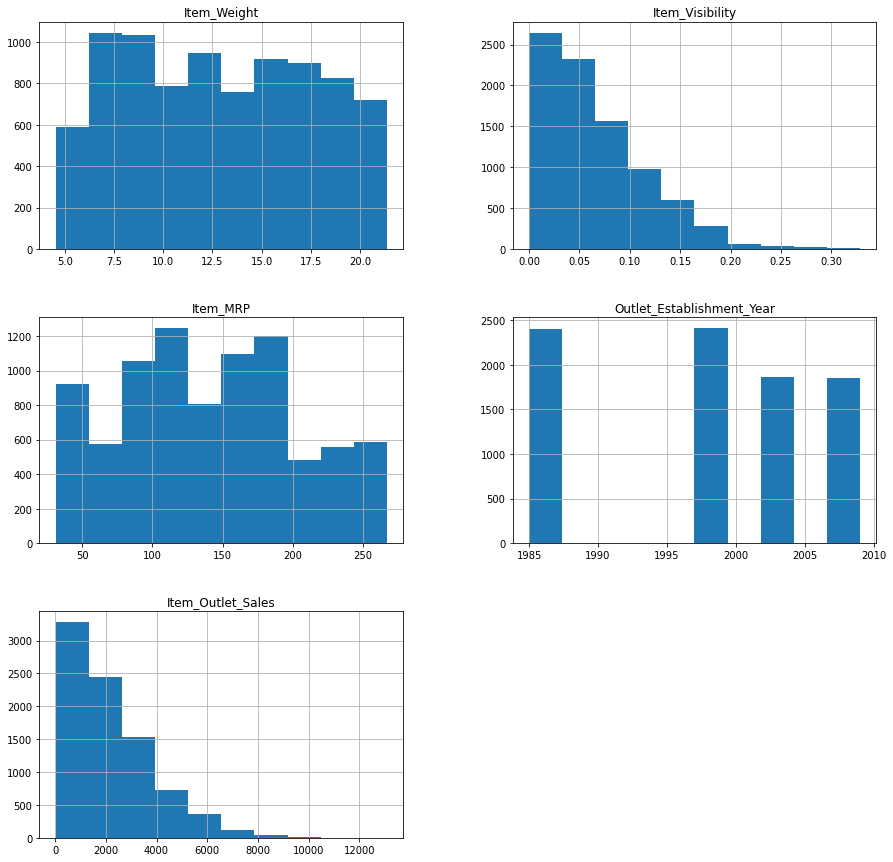

In [30]:
#Histograma para ver las distribuciones de diversas características en el conjunto de datos.
# De manera rápida para las variables numéricas se pueden presentar los siguientes plots:
data_predicciones.hist(figsize = (15,15))

***GRÁFICOS ASOCIADOS A RECUENTOS Y SUMAS***

In [ ]:
#Valor de la venta
data_predicciones['valor_venta']=(data_predicciones['Item_MRP']*data_predicciones['Item_Outlet_Sales'])

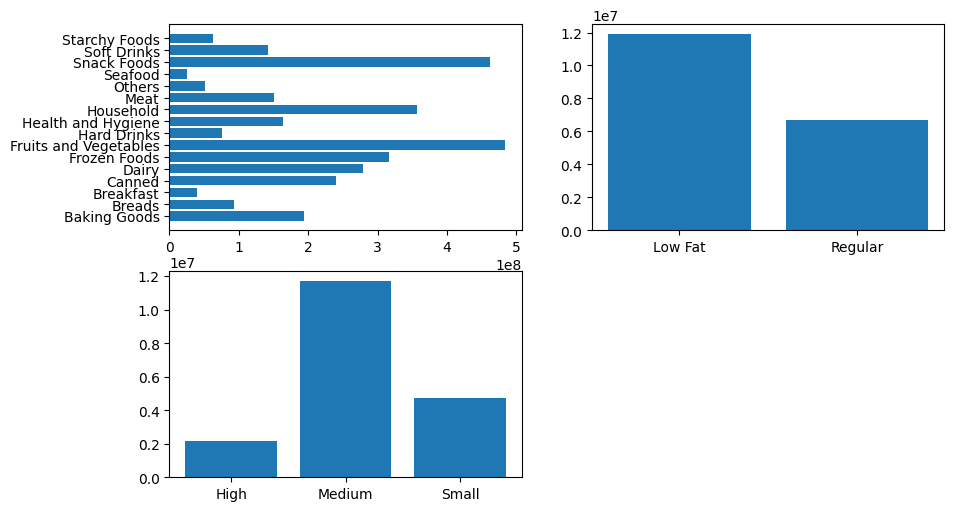

In [193]:
fig1 = plt.figure(dpi = 100, figsize=(10,6))
### subgráfico 1
ax1 = fig1.add_subplot(2,2,1) #1 fila, 2 columna y 2 (sub)gráfico 2
ax1.barh(data_predicciones.groupby(['Item_Type'])[['valor_venta']].sum().reset_index()['Item_Type'], data_predicciones.groupby(['Item_Type'])[['valor_venta']].sum().reset_index()['valor_venta'])

### subgráfico 2
ax2 = fig1.add_subplot(2,2,2) #1 fila, 2 columna y 1 (sub)gráfico 1. 
ax2.bar(data_predicciones.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum().reset_index()['Item_Fat_Content'], data_predicciones.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum().reset_index()['Item_Outlet_Sales'])

### subgráfico 3
ax3 = fig1.add_subplot(2,2,3) #1 fila, 2 columna y 1 (sub)gráfico 1. Puede tener 2 (sub)gráficos
ax3.bar(data_predicciones.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].sum().reset_index()['Outlet_Size'], data_predicciones.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].sum().reset_index()['Item_Outlet_Sales'])
plt.show()

#De los gráficos que se realizaron se determina que los productos que más valor de venta generaron fueron las frutas y vegetales y los snack, al igual se ve que hay 
# gran cantidad de comida baja en grasa, esto es interesante ya que se observa una tendencia "saludable" en los compradores, de igual manera el tamaño
# de tiendas que generan mayor cantidad de ingresos son las de mediano tamaño, claro esto está sesgado por el supuesto realizado

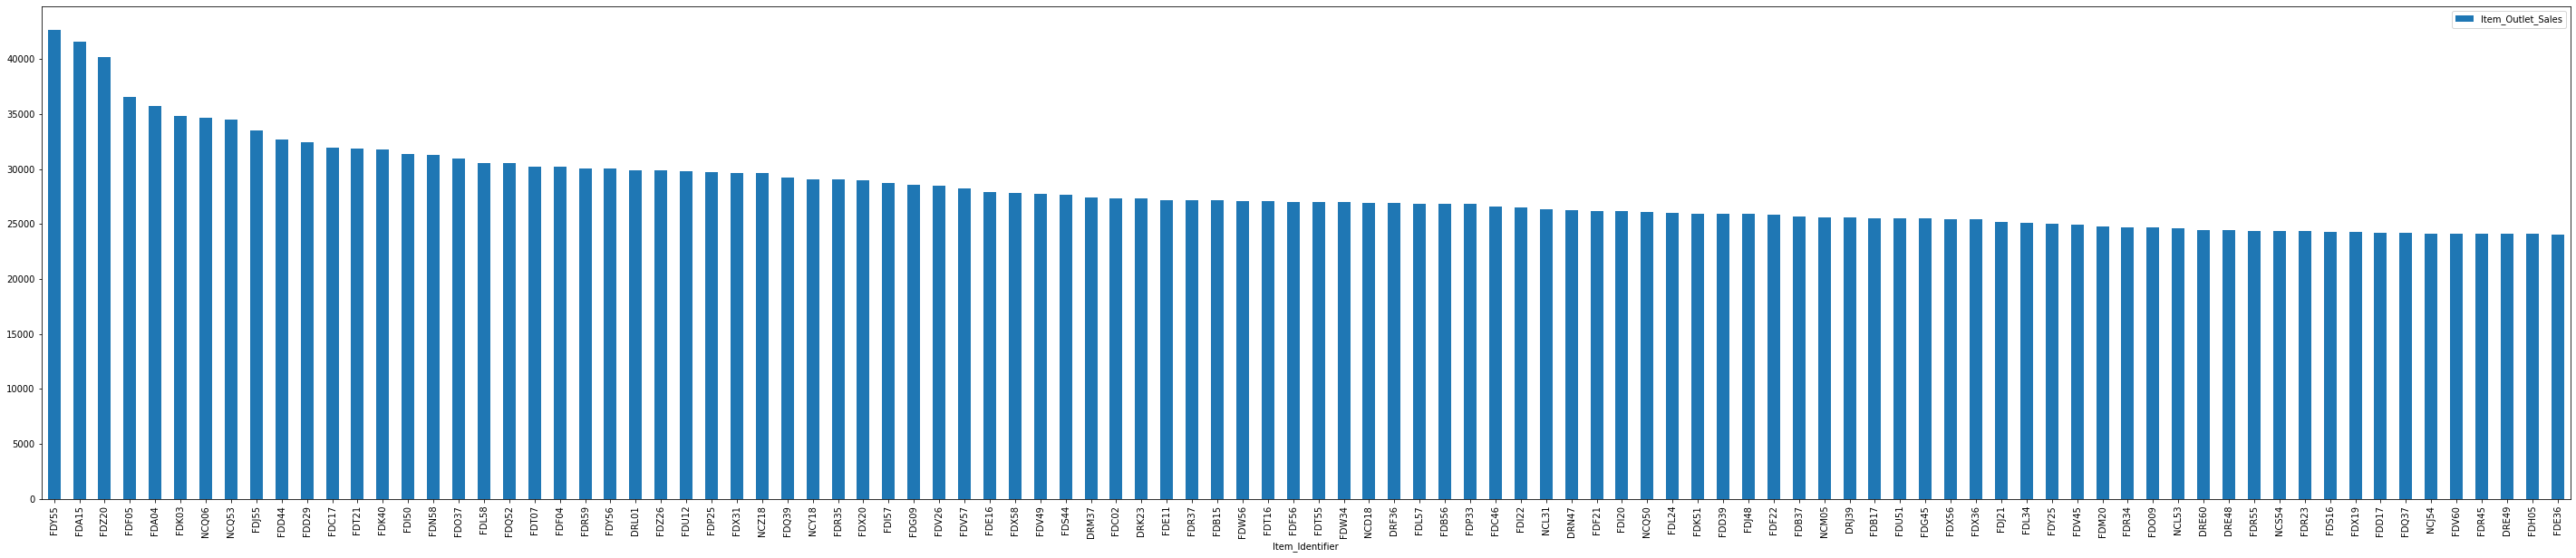

In [188]:
#Vamos a averiguar cuáles son los 100 productos más vendidos, dado que si hay una diferencia en las cantidades de ventas pues el ítem del producto es clave para indicar que sí 
# hay una relación entre estos y la cantidad de ventas.
data_predicciones.groupby(['Item_Identifier'])[['Item_Outlet_Sales']].sum().sort_values(by="Item_Outlet_Sales", ascending=False).reset_index().head(100).plot(kind='bar', x='Item_Identifier', figsize=(50,10))

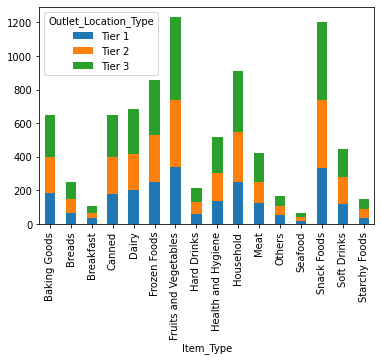

In [196]:
pd.crosstab(data_predicciones['Item_Type'],data_predicciones['Outlet_Location_Type']).plot(kind='bar',stacked=True)
#Se observa que en los tipos de área 2y3 es dónde más se venden los productos de mayor venta, se esperaría que estos tuvieran una mayor superficie de venta.

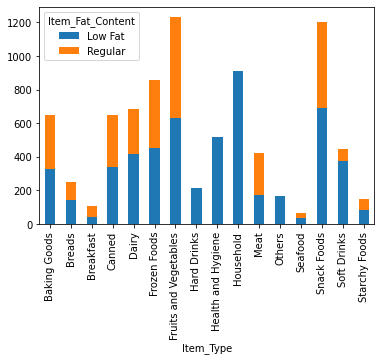

In [197]:
pd.crosstab(data_predicciones['Item_Type'],data_predicciones['Item_Fat_Content']).plot(kind='bar',stacked=True)
#El gráfico se realiza con el fin de determinar si la combinación del tipo de ítem y su contenido de grasa tienen relación con su venta, pero en el caso
# de los dos productos más vendidos se observa que tienen una clasificación 50/50, siendo algo extraño ver frutas y vegetales con contenido regular de grasa,
# cuando debería ser bajo en grasa.

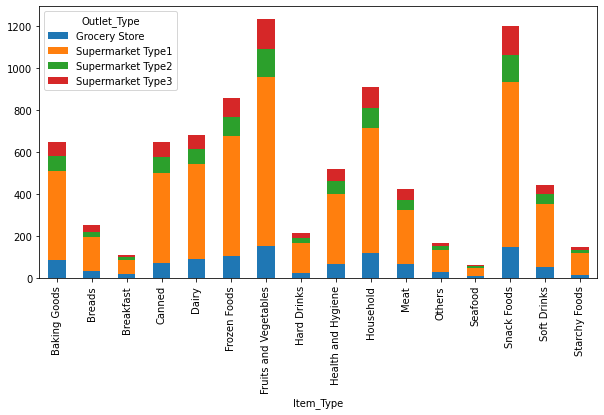

In [199]:
pd.crosstab(data_predicciones['Item_Type'],data_predicciones['Outlet_Type']).plot(kind='bar',stacked=True, figsize = (10,5))
#El gráfico nos indica que en la mayoría de los casos se utilizan supermercados tipo 1, por lo que este factor podría ser relevante al momento de determinar 
# dónde se van a producir más ventas.

####***BOXPLOT***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2]), <a list of 2 Text major ticklabel objects>)

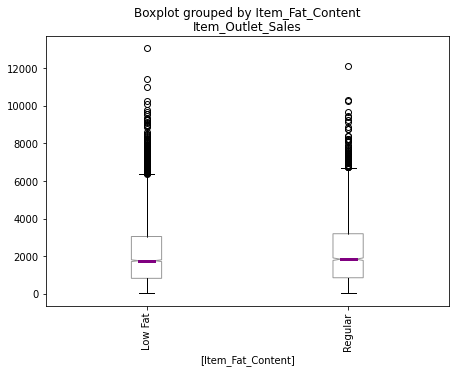

In [154]:
data_predicciones.boxplot(column= 'Item_Outlet_Sales',
                          by=['Item_Fat_Content'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)

#Caando observamos la mediana de las ventas de los productos con y sin grasa, al estar ambas muescas tan cerca, podremos decir que definitivamente las ventas de productos
# con alto o bajo contenido de grasa son smilares, aclarando que como se observó con anterioridad, hay productos que no deberían estar clasificados como con 
# contenido de grasa regular.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 16 Text major ticklabel objects>)

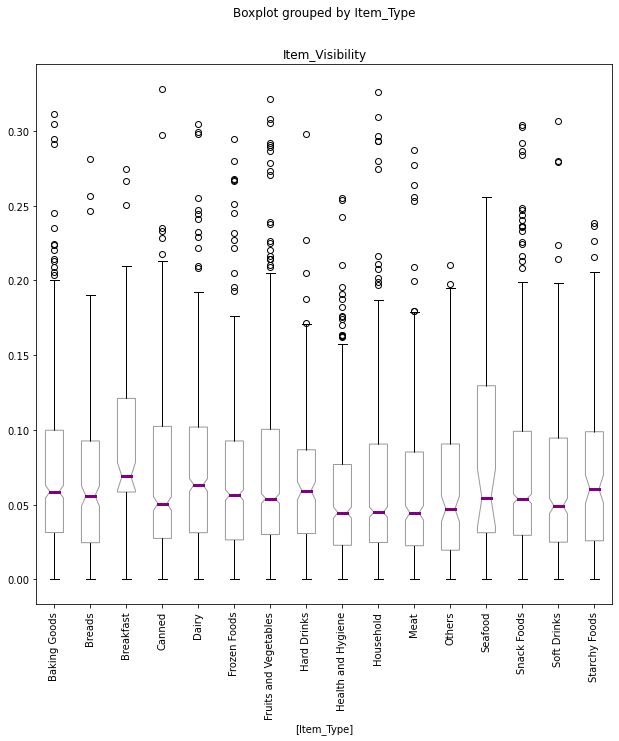

In [203]:
data_predicciones.boxplot(column= 'Item_Visibility',
                          by=['Item_Type'], 
                          figsize = (10,10), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)
#Se observa que elementos precederos como los desayunos y la comida de mar tiene mayor visibilidad, en comparación con los más vendidos como las frutas y los snacks

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

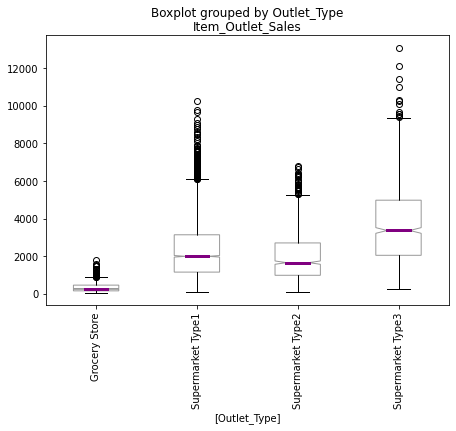

In [207]:
data_predicciones.boxplot(column= 'Item_Outlet_Sales',
                          by=['Outlet_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)
#Se espera validar si el tipo de la tienda inluencia realmente las ventas y sí, los supermercados tipo 3, tienen una mediana de venta mayor, esto no es lo mismo
# que la cantidad de veces que se vendió en total por cada tipo de supercie, esto es, que es más probable una gran venta en super tipo 3 cuando se realiza 
# un venta allí.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

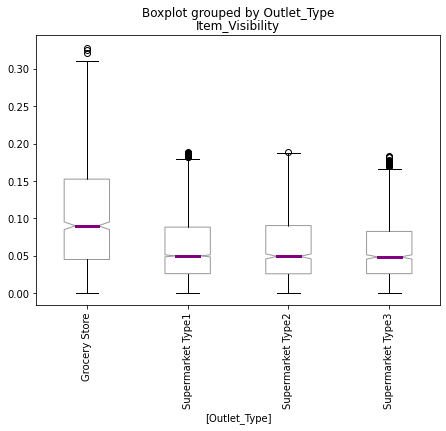

In [206]:
data_predicciones.boxplot(column= 'Item_Visibility',
                          by=['Outlet_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=90)
# Al analizar la visbilidad de los productos se puede observa que en las tiendas donde se hace menor compra en cantidad, los productos estuvieron más visibles.
# Posiblemente como es más pequeño, lo que hay es más fácil de ver. 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


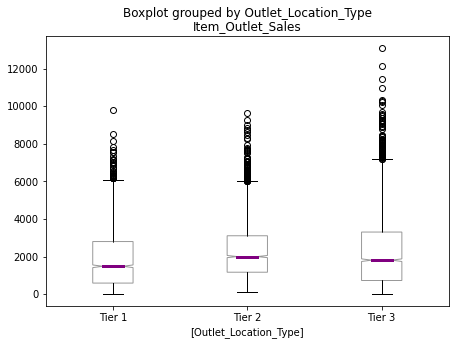

In [157]:
data_predicciones.boxplot(column= 'Item_Outlet_Sales',
                          by=['Outlet_Location_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Purple'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))

# Respecto a la locación, se podría decía que las tiendas tipo 2 tienen una ventaja respecto a los demás tipos de locación, pues su caja es más cerrada y la mediana está
#levemente más elevada que la de los otros tipos de tiendas.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

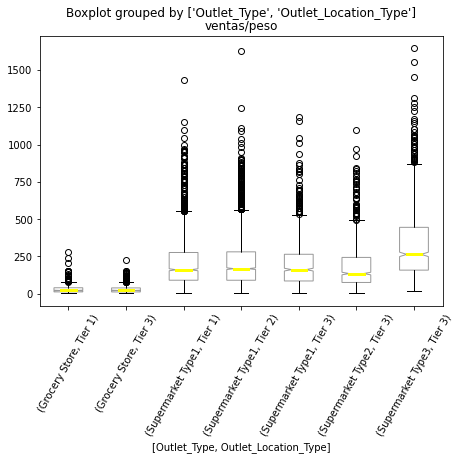

In [164]:
data_predicciones['ventas/peso']=data_predicciones['Item_Outlet_Sales']/data_predicciones['Item_Weight']

data_predicciones.boxplot(column= 'ventas/peso',
                          by=['Outlet_Type','Outlet_Location_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=60)

#Se pretendía analizar si la venta estaba influenciada por el peso, pero se observa simepre el mismo comportamiento, la superficie de tipo 3 es aquella con el mejor desempeño
# es la que tiene la mayor capacidad para la venta a gran escala, posiblemente.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

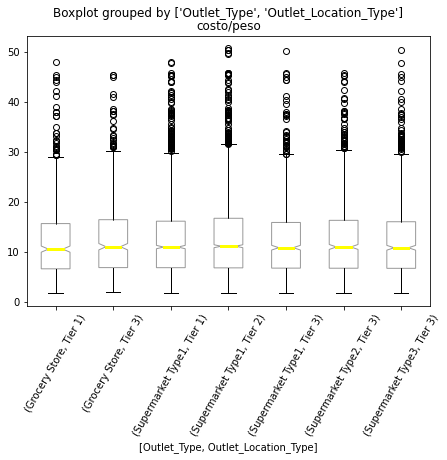

In [208]:
data_predicciones['costo/peso']=data_predicciones['Item_MRP']/data_predicciones['Item_Weight']

data_predicciones.boxplot(column= 'costo/peso',
                          by=['Outlet_Type','Outlet_Location_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=60)
#Se trata de validar si hay alguna diferencia en la unidad de costo por unidad de peso, pero todos los tipos de tiendas y locación, presentan un 
#comportamiento similar.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

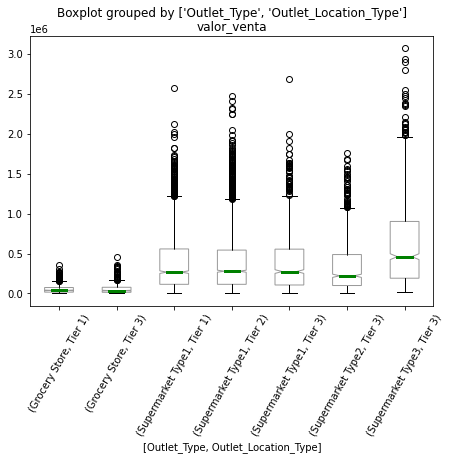

In [170]:
data_predicciones.boxplot(column= 'valor_venta',
                          by=['Outlet_Type','Outlet_Location_Type'], 
                          figsize = (7,5), 
                          notch=True, 
                          grid=False,
                          patch_artist=True,
                          medianprops = dict(linestyle='-', linewidth=3, color='Green'),
                          boxprops = dict(linestyle='-', linewidth=1, color='Black', facecolor='White',alpha = .4),
                          color=dict( whiskers='k', caps='k'))
plt.xticks(rotation=60)

#Finalmente, y siguiendo el mismo patrón, el mayor valor por venta es el de la tienda tipo 3 en la locación 3, seguida de la tienda 1 en todas sus superficies.

####***MAPAS DE CALOR***

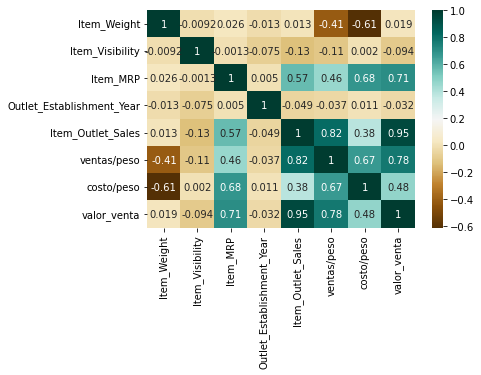

In [212]:
variable_corr = data_predicciones.corr()
sns.heatmap(variable_corr,cmap='BrBG', annot=True)

In [220]:
df_categorias_dumi = pd.get_dummies(data_predicciones, columns = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [221]:
df_categorias_dumi

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,ventas/peso,costo/peso,valor_venta,Item_Fat_Content_Low Fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0.016047,249.8092,1999,3735.1380,401.627742,26.861204,933071.835670,1,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,2009,443.4228,74.902500,8.153581,21403.663818,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.500,0.016760,141.6180,1999,2097.2700,119.844000,8.092457,297011.182860,1,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.000000,182.0950,1998,732.3800,38.144792,9.484115,133362.736100,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.930,0.000000,53.8614,1987,994.7052,111.389160,6.031512,53576.214659,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,1987,2778.3834,404.717174,31.248623,596023.808058,1,...,1,0,0,0,0,1,0,1,0,0
8519,FDS36,8.380,0.046982,108.1570,2002,549.2850,65.547136,12.906563,59409.017745,0,...,0,1,0,0,1,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,2004,1193.1136,112.557887,8.030415,101560.693105,1,...,0,0,1,0,1,0,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,2009,1845.5976,255.977476,14.304189,190342.386400,0,...,0,1,0,0,0,1,0,0,1,0


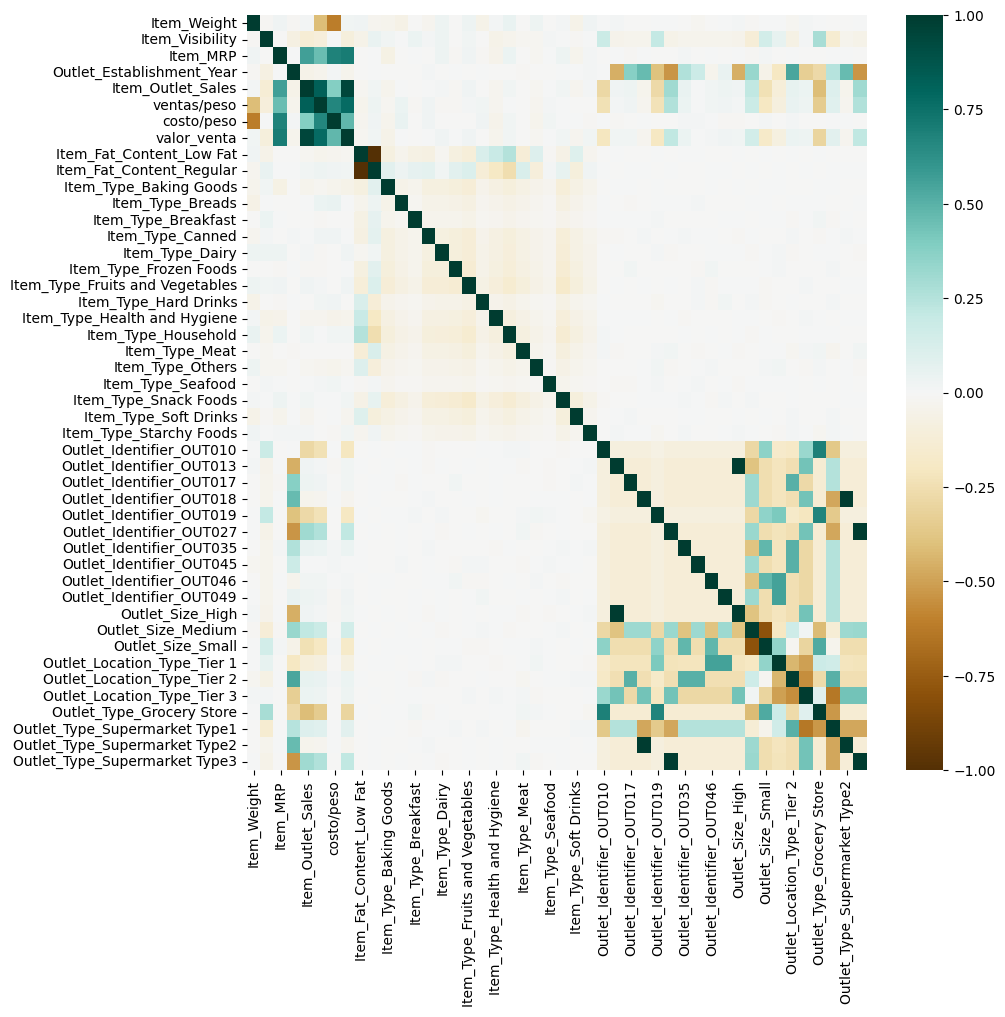

In [223]:
var_corr_categorico= df_categorias_dumi.corr()
plt.figure(dpi = 100, figsize=(10,10))
sns.heatmap(var_corr_categorico,cmap='BrBG')

Se observa que las ventas tienen relación especial con la tiendas dónde se producen, con la relación costo/peso, con el tipo de tienda y el tipo de supermercado principalmente